<h2>Predicting Heart Attack Risk</h2>
<h3>Notebook 3: Data Processing And Hypothesis Testing</h3>
<p><b>Author: Nikhar Bhavsar</b></p>

<hr>
<p>In this notebook, we will perform Data Processing and Hypothesis Testing, which are important steps in preparing data for our models. Specifically, we will:</p>

<b>Split our Data:</b> 
 <ul> 
      <li>Split dataset into Test and Training set</b></li> 
 </ul> 
 <b>Data Preprocessing:</b> 
 <ul> 
      <li>Encode <b>categorical variables using One-hot or Label encoding</b></li> 
 </ul> 
<b>Hypothesis Testing:</b> 
<ul>  
  <li>Perform <b>statistical comparisons</b> (t-tests, ANOVA)</li> 
  <li>Analyze <b>correlation</b> between variables using Pearson corelation</li> 
  <li>Use <b>Chi-square tests</b> for categorical relationships</li> 
</ul> 


## Table of Contents
1. [Importing Libraries](#importing-libraries)
2. [Defining functions](#defining-functions)
3. [Loading Data](#loading-data)
4. [Train-Test Split](#train-test_split)
5. [Data PreProcessing](#data-preprocessing)
6. [Hypothesis Testing](#hypothesis_testing)

## Importing Libraries

In [7]:
import sys
import os
sys.path.append(os.path.abspath('../utilities'))
import functions
import pre_processing_functions

In [8]:
import numpy as np  
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns  

# Data Preprocessing
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif 

# Hypothesis Testing
from scipy.stats import shapiro, ks_2samp  
from scipy.stats import ttest_ind, f_oneway 
from scipy.stats import pearsonr, spearmanr  
from scipy.stats import chi2_contingency  

## Loading Data

In [10]:
df = functions.import_csv('./../data/heart_attack_cleaned_v2.csv')
functions.define_df_settings()

Let's look at the columns which are present into our dataset.

In [12]:
df.head(10)

,State,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadCOPD,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers
0,Alabama,Female,Very good,Yes,9.0,No,No,No,No,No,Yes,No,Former smoker,No,White,65-69,1.60,71.67,27.99,No
1,Alabama,Male,Very good,Yes,6.0,No,No,No,No,No,Yes,Yes,Former smoker,No,White,70-74,1.78,95.25,30.13,No
2,Alabama,Male,Very good,No,8.0,No,No,No,No,No,Yes,No,Former smoker,Yes,White,75-79,1.85,108.86,31.66,Yes
3,Alabama,Female,Fair,Yes,9.0,No,No,No,No,No,Yes,No,Never smoked,No,White,80+,1.70,90.72,31.32,No
4,Alabama,Female,Good,Yes,5.0,No,No,No,No,No,Yes,No,Never smoked,No,White,80+,1.55,79.38,33.07,No
5,Alabama,Male,Good,Yes,7.0,No,No,No,No,No,No,No,Never smoked,Yes,White,50-54,1.85,120.20,34.96,Yes
6,Alabama,Female,Good,Yes,8.0,No,No,Yes,No,No,No,Yes,Never smoked,Yes,Black,80+,1.63,88.00,33.30,No
7,Alabama,Male,Fair,Yes,8.0,Yes,Yes,No,No,No,Yes,Yes,Never smoked,Yes,White,75-79,1.75,74.84,24.37,No
8,Alabama,Male,Good,No,6.0,No,No,No,No,No,Yes,No,Former smoker,Yes,White,40-44,1.70,78.02,26.94,No
9,Alabama,Female,Very good,Yes,7.0,No,No,No,No,No,Yes,No,Former smoker,Yes,White,75-79,1.68,63.50,22.60,No


## Create Data-Dictionary
It will be the good idea to create the data-dictionary. So we can have a quick look when we want.

In [14]:
feature_descriptions = {
    "State": "State FIPS Code",
    "Sex": "Sex of Respondent",
    "GeneralHealth": "Would you say that in general your health is:",
    "PhysicalActivities": "Did you participate in any physical activities or exercises in the past month?",
    "SleepHours": "On average, how many hours of sleep do you get in a 24-hour period?",
    "HadHeartAttack": "Ever told you had a heart attack (myocardial infarction)?",
    "HadAngina": "Ever told you had angina or coronary heart disease?",
    "HadStroke": "Ever told you had a stroke?",
    "HadAsthma": "Ever told you had asthma?",
    "HadSkinCancer": "Ever told you had skin cancer (not melanoma)?",
    "HadCOPD": "Ever told you had COPD, emphysema, or chronic bronchitis?",
    "HadDepressiveDisorder": "Ever told you had a depressive disorder (e.g., major depression, dysthymia)?",
    "HadKidneyDisease": "Ever told you had kidney disease (excluding kidney stones, bladder infection, incontinence)?",
    "HadArthritis": "Ever told you had arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia?",
    "HadDiabetes": "Ever told you had diabetes?",
    "SmokerStatus": "Four-level smoker status: Everyday smoker, Someday smoker, Former smoker, Non-smoker",
    "ECigaretteUsage": "E-cigarette usage: Never used, currently using daily/some days, or used in the past but not currently",
    "ChestScan": "Have you ever had a CT or CAT scan of your chest area?",
    "RaceEthnicityCategory": "Five-level race/ethnicity category",
    "AgeCategory": "Fourteen-level age category",
    "HeightInMeters": "Reported height in meters",
    "WeightInKilograms": "Reported weight in kilograms",
    "BMI": "Body Mass Index (BMI)",
    "AlcoholDrinkers": "Adults who reported having had at least one drink of alcohol in the past 30 days",
}

# Create data dictionary
heart_attack_data_dictionary = functions.generate_data_dictionary(df,feature_descriptions)
display(heart_attack_data_dictionary)

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
0,State,object,State FIPS Code,54,0,"[Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, District of Columbia, Florida, Georgia, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Hampshire, New Jersey, New Mexico, New York, North Carolina, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Carolina, South Dakota, Tennessee, Texas, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming, Guam, Puerto Rico, Virgin Islands]",N/A
1,Sex,object,Sex of Respondent,2,0,"[Female, Male]",N/A
2,GeneralHealth,object,Would you say that in general your health is:,5,0,"[Very good, Fair, Good, Excellent, Poor]",N/A
3,PhysicalActivities,object,Did you participate in any physical activities or exercises in the past month?,2,0,"[Yes, No]",N/A
4,SleepHours,float64,"On average, how many hours of sleep do you get in a 24-hour period?",14,0,"[9.0, 6.0, 8.0, 5.0, 7.0, 10.0, 4.0, 12.0, 3.0, 7.0360132906678885, 11.0, 14.0, 15.0, 13.0]","(3.0, 15.0)"
5,HadHeartAttack,object,Ever told you had a heart attack (myocardial infarction)?,2,0,"[No, Yes]",N/A
6,HadAngina,object,Ever told you had angina or coronary heart disease?,2,0,"[No, Yes]",N/A
7,HadStroke,object,Ever told you had a stroke?,2,0,"[No, Yes]",N/A
8,HadCOPD,object,"Ever told you had COPD, emphysema, or chronic bronchitis?",2,0,"[No, Yes]",N/A
9,HadKidneyDisease,object,"Ever told you had kidney disease (excluding kidney stones, bladder infection, incontinence)?",2,0,"[No, Yes]",N/A


## Train-Test Split

Let's check the distribution of our Target feature first before we split the data.

Text(0, 0.5, 'Count')

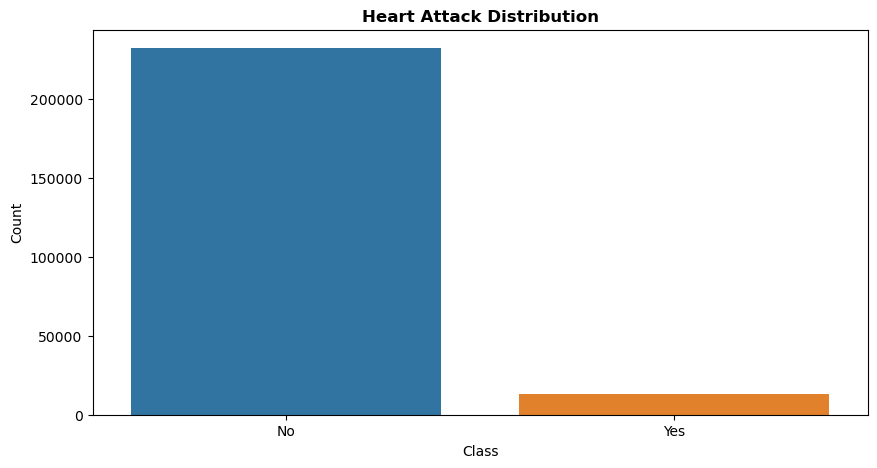

In [17]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='HadHeartAttack', data=df)
plt.title('Heart Attack Distribution', fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Count')

From the distribution we can clearly see that we have the data-imbalance issue in our dataset. During our split we need to handle this case so we don't end up to train our model bias towards majority class.

In [19]:
patient_health = df.drop('HadHeartAttack', axis=1)
heart_attack_status = df['HadHeartAttack']

# Spliting our data into Test and Train sets to prevent data leckage
# Here stratify will make sure we have equal number of samples of the minority class
patient_health_train, patient_health_test, heart_attack_status_train, heart_attack_status_test = train_test_split(
    patient_health, heart_attack_status,
    test_size=0.2,
    stratify=heart_attack_status,
    random_state=42
)

Let's verify if the skLearn has done it's job right or not

In [21]:
# Verify class distribution
print("Original class distribution:")
print(heart_attack_status.value_counts(normalize=True))

print("\nTrain class distribution:")
print(heart_attack_status_train.value_counts(normalize=True))

print("\nTest class distribution:")
print(heart_attack_status_test.value_counts(normalize=True))

Original class distribution:
HadHeartAttack
No     0.945379
Yes    0.054621
Name: proportion, dtype: float64

Train class distribution:
HadHeartAttack
No     0.945381
Yes    0.054619
Name: proportion, dtype: float64

Test class distribution:
HadHeartAttack
No     0.945371
Yes    0.054629
Name: proportion, dtype: float64


As we can see the test and train data both has the equal percentage of positive and negative distribution for HadHeartAttack feature.

## Data PreProcessing

For our first step we will encode our categorical variable using Onehot and Ordinal encoder. 

Let's look into our first column state.

In [25]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'State']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
0,State,object,State FIPS Code,54,0,"[Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, District of Columbia, Florida, Georgia, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Hampshire, New Jersey, New Mexico, New York, North Carolina, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Carolina, South Dakota, Tennessee, Texas, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming, Guam, Puerto Rico, Virgin Islands]",N/A


As we can see we have many state values which don't have the linear relationship between them. So Onehot encoding will be the perfect choice for this feature.

In [27]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'Sex']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
1,Sex,object,Sex of Respondent,2,0,"[Female, Male]",N/A


For our Sex feature has two values Male and Female.At a first look we can hink that they are the ordinnal categories but we can't find any linear relationship between them. So it will be a good idea to encode them using the onehot encoder.

In [29]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'GeneralHealth']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
2,GeneralHealth,object,Would you say that in general your health is:,5,0,"[Very good, Fair, Good, Excellent, Poor]",N/A


In [30]:
heart_attack_data_dictionary[heart_attack_data_dictionary['Column Name'] == 'AgeCategory']

,Column Name,Data Type,Description,Unique Values,Missing Values,Distinct Values,Value Range
15,AgeCategory,object,Fourteen-level age category,13,0,"[65-69, 70-74, 75-79, 80+, 50-54, 40-44, 60-64, 55-59, 45-49, 35-39, 25-29, 30-34, 18-24]",N/A


GeneralHealth has five categories and we can clearly see that all of the categories has the linear relationship between them. So the ordinal encoder will be the beeter choice and the same thing will goes for the AgeCategory feature.

Let's apply the encoder on all of the features.

In [33]:
patient_health_train_encoded = pd.DataFrame(index=patient_health_train.index)
patient_health_test_encoded = pd.DataFrame(index=patient_health_test.index)

# Map the Feature and their encoding types
column_encodings = {
    'State': 'onehot',
    'Sex': 'onehot',
    'GeneralHealth': 'ordinal',
    'RaceEthnicityCategory': 'onehot',
    'AgeCategory': 'ordinal'
}

# Custom order for AgeCategory
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44',
             '45-49', '50-54', '55-59', '60-64', '65-69',
             '70-74', '75-79', '80+']

for col, enc in column_encodings.items():
    custom_order = age_order if col == 'AgeCategory' else None
    train_col_encoded, test_col_encoded = pre_processing_functions.encode_column_train_test(patient_health_train, patient_health_test, col, enc, custom_order)
    
    patient_health_train_encoded = pd.concat([patient_health_train_encoded, train_col_encoded], axis=1)
    patient_health_test_encoded = pd.concat([patient_health_test_encoded, test_col_encoded], axis=1)

/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
patient_health_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196599 entries, 163414 to 245539
Data columns (total 63 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   State_Alabama                      196599 non-null  float64
 1   State_Alaska                       196599 non-null  float64
 2   State_Arizona                      196599 non-null  float64
 3   State_Arkansas                     196599 non-null  float64
 4   State_California                   196599 non-null  float64
 5   State_Colorado                     196599 non-null  float64
 6   State_Connecticut                  196599 non-null  float64
 7   State_Delaware                     196599 non-null  float64
 8   State_District of Columbia         196599 non-null  float64
 9   State_Florida                      196599 non-null  float64
 10  State_Georgia                      196599 non-null  float64
 11  State_Guam                         1965